In [1]:
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import tensorflow as tf
from functools import partial
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Rescaling

from tensorflow.keras.layers.experimental.preprocessing import Rescaling

import pickle
import numpy as np


/opt/anaconda3/envs/tensorflowEnv/lib/python3.6/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
[test_set_raw, valid_set_raw, train_set_raw], info = tfds.load("tf_flowers",split=["train[:10%]", "train[10%:25%]", "train[25%:]"], as_supervised=True,with_info=True)

In [3]:
info

tfds.core.DatasetInfo(
    name='tf_flowers',
    full_name='tf_flowers/3.0.1',
    description="""
    A large set of images of flowers
    """,
    homepage='https://www.tensorflow.org/tutorials/load_data/images',
    data_path='/Users/kamilstecyk/tensorflow_datasets/tf_flowers/3.0.1',
    download_size=218.21 MiB,
    dataset_size=221.83 MiB,
    features=FeaturesDict({
        'image': Image(shape=(None, None, 3), dtype=tf.uint8),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=5),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'train': <SplitInfo num_examples=3670, num_shards=2>,
    },
    citation="""@ONLINE {tfflowers,
    author = "The TensorFlow Team",
    title = "Flowers",
    month = "jan",
    year = "2019",
    url = "http://download.tensorflow.org/example_images/flower_photos.tgz" }""",
)

In [4]:
class_names = info.features["label"].names
n_classes = info.features["label"].num_classes
dataset_size = info.splits["train"].num_examples


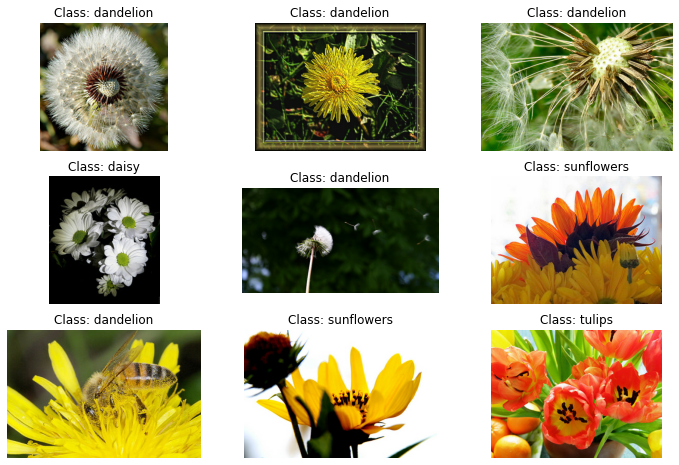

In [5]:
plt.figure(figsize=(12, 8))
index = 0
sample_images = train_set_raw.take(9) 

for image, label in sample_images:
    index += 1
    plt.subplot(3, 3, index)
    plt.imshow(image)
    plt.title("Class: {}".format(class_names[label])) 
    plt.axis("off")
    
plt.show(block=False)

In [6]:
def preprocess(image, label):
    resized_image = tf.image.resize(image, [224, 224]) 
    return resized_image, label

In [7]:
batch_size = 32
train_set = train_set_raw.map(preprocess).shuffle(dataset_size).batch(batch_size).prefetch(1)
valid_set = valid_set_raw.map(preprocess).batch(batch_size).prefetch(1)
test_set = test_set_raw.map(preprocess).batch(batch_size).prefetch(1)

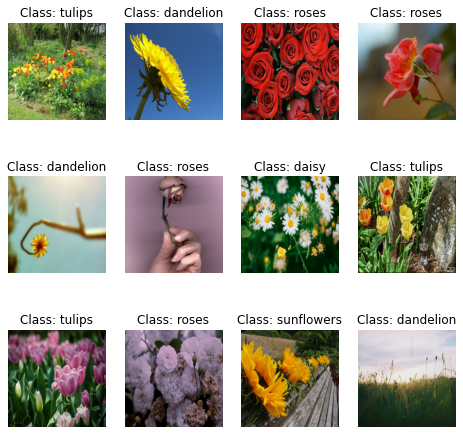

In [18]:
plt.figure(figsize=(8, 8))
sample_batch = train_set.take(1)

for X_batch, y_batch in sample_batch:
    for index in range(12):
        plt.subplot(3, 4, index + 1)
        plt.imshow(X_batch[index]/255.0)
        plt.title("Class: {}".format(class_names[y_batch[index]])) 
        plt.axis("off")
    
    
plt.show()

In [10]:
model=Sequential()

model.add(Rescaling(scale=1./127.5, offset=-1))

#adding convolution layer
model.add(Conv2D(16,(7,7),activation='relu',input_shape=(224,224,1)))
#adding pooling layer
model.add(MaxPool2D(2,2))

model.add(Conv2D(filters=32,kernel_size = 5))
model.add(Conv2D(filters=32,kernel_size = 5))
model.add(MaxPool2D(2,2))



#adding fully connected layer
model.add(Flatten())
model.add(Dense(100,activation='relu'))
#adding output layer
model.add(Dense(10,activation='softmax'))
#compiling the model
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
#fitting the model
model.fit(train_set,validation_data = valid_set,epochs=10)



86/86 [==============================] - 99s 1s/step - loss: 2.1519 - accuracy: 0.4073 - val_loss: 1.2198 - val_accuracy: 0.4955


In [11]:
accTrain = model.evaluate(train_set, verbose=0)[1]
accValid = model.evaluate(valid_set, verbose=0)[1]
accTest = model.evaluate(test_set, verbose=0)[1]

In [15]:
tupleResult = (accTrain,accValid,accTest)

pickle_out = open("simple_cnn_acc.pkl","wb")
pickle.dump(tupleResult, pickle_out)
pickle_out.close()




(0.551598846912384, 0.4954628050327301, 0.4986376166343689)

In [25]:
def preprocess2(image, label):
    resized_image = tf.image.resize(image, [224, 224])
    final_image = tf.keras.applications.xception.preprocess_input(resized_image)
    return final_image, label

In [26]:
batch_size = 32
train_set = train_set_raw.map(preprocess2).shuffle(dataset_size).batch(batch_size).prefetch(1)
valid_set = valid_set_raw.map(preprocess2).batch(batch_size).prefetch(1)
test_set = test_set_raw.map(preprocess2).batch(batch_size).prefetch(1)

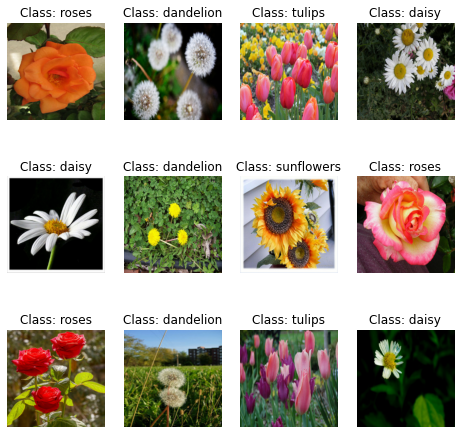

In [27]:
plt.figure(figsize=(8, 8)) 
sample_batch = train_set.take(1)

for X_batch, y_batch in sample_batch:
    for index in range(12):
        plt.subplot(3, 4, index + 1)
        plt.imshow(X_batch[index] / 2 + 0.5)
        plt.title("Class: {}".format(class_names[y_batch[index]]))
        plt.axis("off")
        
plt.show()

In [29]:
base_model = tf.keras.applications.xception.Xception( weights="imagenet",include_top=False)

for index, layer in enumerate(base_model.layers):
    print(index, layer.name)

0 input_2
1 block1_conv1
2 block1_conv1_bn
3 block1_conv1_act
4 block1_conv2
5 block1_conv2_bn
6 block1_conv2_act
7 block2_sepconv1
8 block2_sepconv1_bn
9 block2_sepconv2_act
10 block2_sepconv2
11 block2_sepconv2_bn
12 conv2d_10
13 block2_pool
14 batch_normalization_4
15 add_12
16 block3_sepconv1_act
17 block3_sepconv1
18 block3_sepconv1_bn
19 block3_sepconv2_act
20 block3_sepconv2
21 block3_sepconv2_bn
22 conv2d_11
23 block3_pool
24 batch_normalization_5
25 add_13
26 block4_sepconv1_act
27 block4_sepconv1
28 block4_sepconv1_bn
29 block4_sepconv2_act
30 block4_sepconv2
31 block4_sepconv2_bn
32 conv2d_12
33 block4_pool
34 batch_normalization_6
35 add_14
36 block5_sepconv1_act
37 block5_sepconv1
38 block5_sepconv1_bn
39 block5_sepconv2_act
40 block5_sepconv2
41 block5_sepconv2_bn
42 block5_sepconv3_act
43 block5_sepconv3
44 block5_sepconv3_bn
45 add_15
46 block6_sepconv1_act
47 block6_sepconv1
48 block6_sepconv1_bn
49 block6_sepconv2_act
50 block6_sepconv2
51 block6_sepconv2_bn
52 block6

In [30]:
avg = keras.layers.GlobalAveragePooling2D()(base_model.output)
output = keras.layers.Dense(n_classes, activation="softmax")(avg)

model = keras.models.Model(inputs=base_model.input, outputs=output)

In [31]:
for layer in base_model.layers:
    layer.trainable = False
    
optimizer = keras.optimizers.SGD(learning_rate=0.2, momentum=0.9, decay=0.01)

model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])
history = model.fit(train_set, validation_data=valid_set, epochs=5)

Epoch 1/5
86/86 [==============================] - 186s 2s/step - loss: 1.5900 - accuracy: 0.7845 - val_loss: 1.8444 - val_accuracy: 0.7877
Epoch 2/5
86/86 [==============================] - 187s 2s/step - loss: 0.4770 - accuracy: 0.9132 - val_loss: 1.0153 - val_accuracy: 0.8475
Epoch 3/5
86/86 [==============================] - 196s 2s/step - loss: 0.2508 - accuracy: 0.9415 - val_loss: 0.8242 - val_accuracy: 0.8693
Epoch 4/5
86/86 [==============================] - 201s 2s/step - loss: 0.1248 - accuracy: 0.9691 - val_loss: 0.7441 - val_accuracy: 0.8657
Epoch 5/5
86/86 [==============================] - 192s 2s/step - loss: 0.0836 - accuracy: 0.9764 - val_loss: 0.6996 - val_accuracy: 0.8657


In [32]:
for layer in base_model.layers: 
    layer.trainable = True
    
optimizer = keras.optimizers.SGD(learning_rate=0.01, momentum=0.9, nesterov=True, decay=0.001)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])
history = model.fit(train_set, validation_data=valid_set,epochs=5)

Epoch 1/5
38/86 [============>.................] - ETA: 7:06 - loss: 0.4704 - accuracy: 0.8487

KeyboardInterrupt: 

In [ ]:
accTrain = model.evaluate(train_set, verbose=0)[1]
accValid = model.evaluate(valid_set, verbose=0)[1]
accTest = model.evaluate(test_set, verbose=0)[1]

In [33]:
tupleResult = (accTrain,accValid,accTest)

pickle_out = open("xception_acc.pkl","wb")
pickle.dump(tupleResult, pickle_out)
pickle_out.close()



